# Spectral Line Summary

This notebook summarizes some properties of the spectral lines that are listed in Table 2 of the original CubiXSS proposal.

One of the goals here is to find lines of different elements that have similar looking contribution functions (in order to make abundance measurements) as well as different looking contribution functions of the same element to do temperature diagnostics (i.e. line ratios).

In [8]:
import astropy.units as u
from astropy.visualization import quantity_support
import numpy as np
import matplotlib.pyplot as plt
import fiasco
from fiasco.io import Parser

The lines listed below are all of those from Table 2.

In [2]:
line_ids = [
    ('Fe XVIII',14.21*u.angstrom),  # also targeted by MaGIXS
    ('Fe XVII', 15.01*u.angstrom),  # also targeted by MaGIXS
    ('Fe XVII', 16.78*u.AA),
    ('Fe XVII', 17.05*u.AA),
    ('O VII', 21.60*u.angstrom),  # also targeted by MaGIXS
    ('O VII', 21.81*u.angstrom),
    ('O VII', 22.10*u.AA),
    ('O VIII', 18.97*u.angstrom),  # also targeted by MaGIXS
    ('Fe XXV', 1.86*u.AA),
    ('Ca XIX', 3.21*u.AA),
    ('Si XIII', 6.74*u.AA),
    ('Mg XI', 9.32*u.AA),
    ('Fe XVII', 11.25*u.AA),
    ('Fe XX', 12.83*u.AA),
    ('Ne IX', 13.45*u.AA),
    ('Fe XIX', 13.53*u.AA),
    ('C VI', 33.73*u.AA),
    ('C V', 40.27*u.AA),
    ('Si XII', 44.16*u.AA),
    ('Si XI', 49.18*u.AA),
]

In [3]:
def get_goft(ion, density, wave):
    g_of_t = ion.contribution_function(density)
    transitions = ion.transitions.wavelength[~ion.transitions.is_twophoton]
    idx = np.argmin(np.abs(transitions - wave))
    return g_of_t[..., idx]

In [4]:
contribution_functions = []
temperature = 10**np.arange(5,7.5,0.05)*u.K
density = 1e9 * u.cm**(-3)
for ion_name, wave in line_ids:
    print(ion_name, wave)
    ion = fiasco.Ion(ion_name, temperature,
                     abundance='sun_coronal_1992_feldman_ext',
                     hdf5_dbase_root='/Users/wtbarnes/Documents/projects/chianti/CHIANTI_v8.0.7/dbase.h5')
    g_of_t = get_goft(ion, density, wave)
    contribution_functions.append(g_of_t[:,0])

Fe XVIII 14.21 Angstrom
Fe XVII 15.01 Angstrom


Fe XVII 16.78 Angstrom


Fe XVII 17.05 Angstrom


O VII 21.6 Angstrom
O VII 21.81 Angstrom
O VII 22.1 Angstrom
O VIII 18.97 Angstrom


Fe XXV 1.86 Angstrom
Ca XIX 3.21 Angstrom
Si XIII 6.74 Angstrom
Mg XI 9.32 Angstrom


Fe XVII 11.25 Angstrom


Fe XX 12.83 Angstrom
Ne IX 13.45 Angstrom
Fe XIX 13.53 Angstrom


C VI 33.73 Angstrom
C V 40.27 Angstrom
Si XII 44.16 Angstrom


Si XI 49.18 Angstrom


(100000.0, 28183829.312643975)

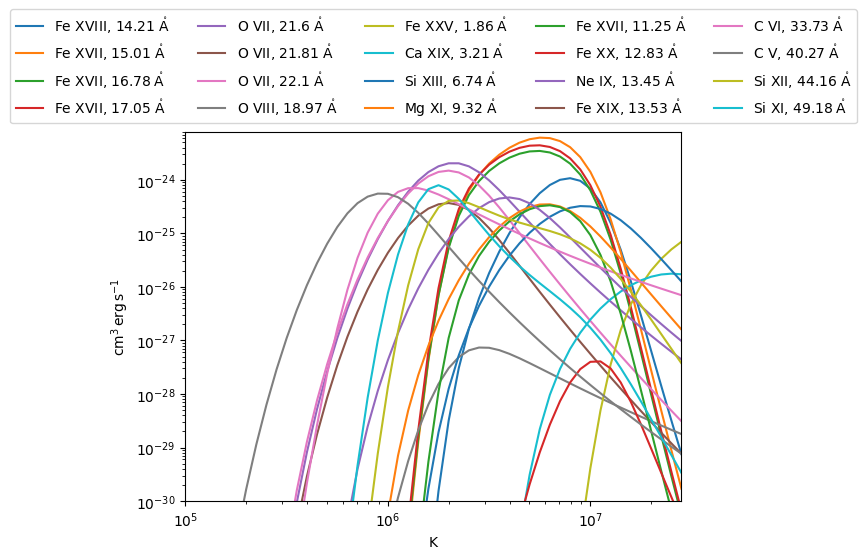

In [11]:
fig = plt.figure()
ax = fig.add_subplot()
with quantity_support():
    for g,(ion,wave) in zip(contribution_functions, line_ids):
        ax.plot(temperature, g, label=f'{ion}, {wave.to_string(format="latex_inline")}')
ax.legend(ncol=5,loc='upper center', bbox_to_anchor=(.5, 1.35))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-30,8e-24)
ax.set_xlim(temperature[[0,-1]].value)
#ax.set_ylim(1e-6,3)

(1e-30, 8e-24)

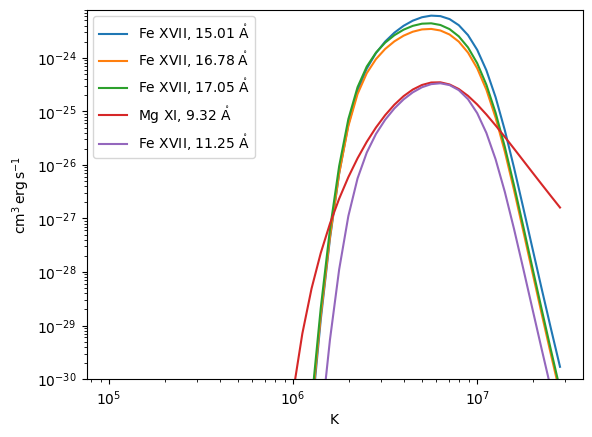

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
with quantity_support():
    for g,(ion,wave) in zip(contribution_functions, line_ids):
        if ion in ('Mg XI', 'Fe XVII'):
            ax.plot(temperature, g, label=f'{ion}, {wave.to_string(format="latex_inline")}')
ax.legend()#ncol=5,loc='upper center', bbox_to_anchor=(.5, 1.35))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-30,8e-24)

In [13]:
si_11 = fiasco.Ion('Si 11', temperature=temperature, abundance='sun_coronal_1992_feldman_ext', hdf5_dbase_root='/Users/wtbarnes/Documents/projects/chianti/CHIANTI_v8.0.7/dbase.h5')
si_12 = fiasco.Ion('Si 12', temperature=temperature, abundance='sun_coronal_1992_feldman_ext', hdf5_dbase_root='/Users/wtbarnes/Documents/projects/chianti/CHIANTI_v8.0.7/dbase.h5')

In [14]:
g_of_t_si11 = get_goft(si_11, 1e10*u.cm**(-3), 43.7620 * u.angstrom)
g_of_t_si12 = get_goft(si_12, 1e10*u.cm**(-3), 44.1603 * u.angstrom)

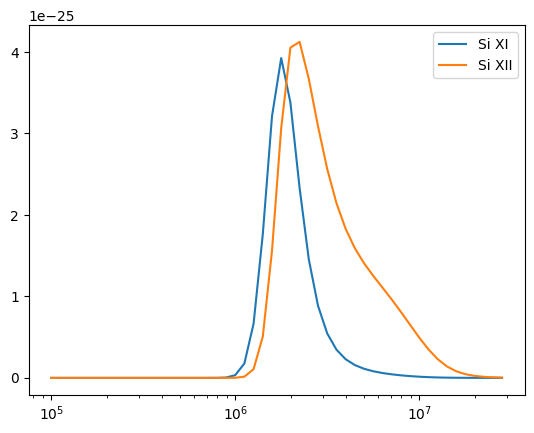

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(temperature, g_of_t_si11[:,0], label='Si XI')
ax.plot(temperature, g_of_t_si12[:,0], label='Si XII')
#ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_ylim(1e-26,1e-24)
ax.legend()

In [18]:
si = fiasco.Element('Si', np.logspace(4,8,1000)*u.K, hdf5_dbase_root='/Users/wtbarnes/Documents/projects/chianti/CHIANTI_v8.0.7/dbase.h5')
ioneq_si = si.equilibrium_ionization

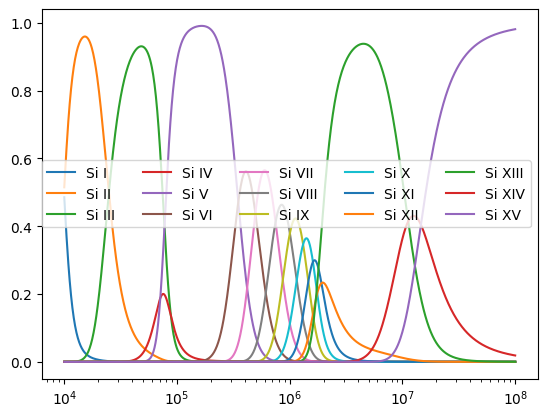

In [19]:
fig = plt.figure()
ax = fig.add_subplot()
for i in si:
    ax.plot(si.temperature, ioneq_si[:, i.charge_state], label=i.ion_name_roman)
ax.set_xscale('log')
ax.legend(ncol=5)